## Unsupervised learning , also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. 
- These algorithms discover hidden patterns or data groupings without the need for human intervention. 
- Its ability to discover similarities and differences in information make it the ideal solution for :
        - Exploratory data analysis
        - Cross-selling strategies 
        - Customer segmentation  
        - Image recognition
        
        
 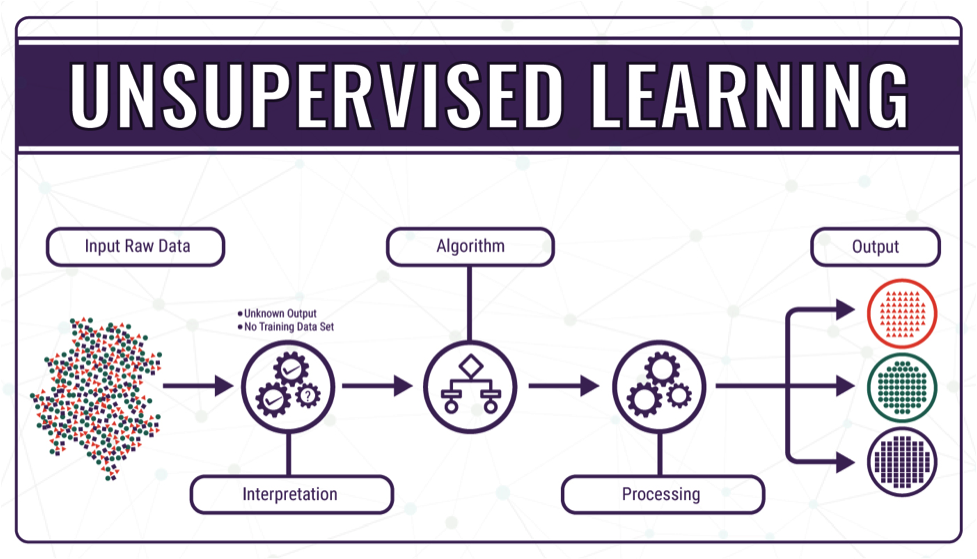
 
 
 ### Examples
 - Determine what the target market will be for a new product that we want to release ( we have no historical data of the demographics of the target market)
 - Google is an instances of clustering that needs unsupervised learning to group news items depends on their content
 -  Social network analysis is conducted to make clusters of friends depends on the frequency of connection between them. Such analysis reveals the links between the users of some social networking website
 - The geographic areas of servers is determined on the basis of clustering of web requests received from a specific area of the world
 - Recommendation Engines: Past purchase behavior coupled with unsupervised learning can be used to help businesses discover data trends that could be used to develop effective cross-selling strategies.
 

In [ ]:
s={1,2,3,3,4}
s
frozenset(s)
#3del s[0]
d={1,2,3,12,-0,0}
d


## There are three main tasks when performing unsupervised learning (in no particular order):
### 1. Clustering
Clustering involves grouping unlabeled data based on their similarities and differences, therefore, when 2 instances appear in different groups we can infer that they have dissimilar properties and/or features.

E.g. : exclusive clustering, overlapping clustering, hierarchical clustering, and probabilistic clustering
### 2. Association Rules 
Association rule learning is a rule-based machine learning method for discovering interesting relationships between variables in a given dataset. The intention of the method is to identify strong rules discovered in data using a measure of interest.
E.g. : Apriori algorithm.

### 3. Dimensionality reduction
This refers to the transformation of data from a high-dimensional space to a low-dimensional space such that the low dimensional space retains meaning properties of the original data. One reason we would reduce the dimensionality of data is to simplify the modeling problem since more input features can make the modeling task more challenging. This is known as the curse of dimensionality.

Libraries installation : pip install --proxy http://u:p@noidaproxy.corp.exlservice.com:8000 pac 

Important Libraries 
- Numpy
- Pandas
- Sckitlearn
- Apyori
## Unsupervised Learning using Association Rule Mining in Python (ARM)
Association Rules mining is useful in Python as well as in other programming languages for item clustering, store layout, and market basket analysis.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from apyori import apriori 

In [7]:
data = pd.read_csv("order_data.csv")
#data=pd.read_csv(r"https://raw.githubusercontent.com/suyashi29/python-su/master/Machine%20Learning%20Unsupervised%20Methods/order_data.csv")
data = pd.read_csv("order_data.csv",delimiter=" ",header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,toothpaste,brush,milk,cereals,honey,bread,butter,cheese,yogurt
1,milk,cereals,honey,bread,cheese,razor,gel,shampoo,NaN
2,milk,cereals,honey,cheese,soap,shampoo,NaN,NaN,NaN
3,honey,bread,butter,cheese,mouthwash,toothpaste,NaN,NaN,NaN
4,cereals,honey,bread,butter,gel,soap,NaN,NaN,NaN


## Let us see some Components of the Apriori Algorithm
**1. Support – It is the measure of the popularity of an itemset that is in how many transactions an item appears from the total number of transactions. It is simply the probability that a customer will buy an item. The mathematical formula to represent support of item X is:** 


**Minimum Support Value = It is a threshold value above which the product can have a meaningful effect on the profit.**

**2. Confidence – It tells us the impact of one product on another that is the probability that if a person buys product X then he/she will buy product Y also. Its representation in mathematical terms is:**


In [ ]:
A - milk butter jam 
B - milk tea
C-  milk butter biscuit
D-  butter jam
E-  butter biscuit


C(Milk/bu)=2/3

S(butter) = 3/5

Lift =2/3 / 3/5

**A major drawback of the confidence is that it only considers the popularity of item X and not of Y. This can decrease the confidence value and therefore can be misleading in understanding the association between different products. 
- To overcome this drawback we have another measure known as Lift.**
### 3. Lift – Overcoming the limitation of confidence measure, Lift will calculate the confidence taking into account the popularity of both items. Representation of lift in mathematical terms is:

## Practical Implemenation of Apriori Algorithm

### To make use of the Apriori algorithm it is required to convert the whole transactional dataset into a single list and each row will be a list in that list.

In [8]:
data_list = []
for row in range(0, 20):
    data_list.append([str(data.values[row,column]) for column in range(0, 9)])

algo = apriori(data_list, min_support=0.25, min_confidence=0.2, min_lift=2, min_length=2)
results = list(algo)

In [9]:
results

[RelationRecord(items=frozenset({'toothpaste', 'brush'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brush'}), items_add=frozenset({'toothpaste'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'toothpaste'}), items_add=frozenset({'brush'}), confidence=0.625, lift=2.5)]),
 RelationRecord(items=frozenset({'mouthwash', 'toothpaste'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mouthwash'}), items_add=frozenset({'toothpaste'}), confidence=0.8571428571428572, lift=2.142857142857143), OrderedStatistic(items_base=frozenset({'toothpaste'}), items_add=frozenset({'mouthwash'}), confidence=0.7499999999999999, lift=2.142857142857143)]),
 RelationRecord(items=frozenset({'honey', 'bread', 'butter'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'butter'}), items_add=frozenset({'honey', 'bread'}), confidence=0.625, lift=2.0833333333333335), OrderedStatistic(items_base=frozenset({'honey', 'bre

We have created a list of lists, then use the apriori method from apriori module and finally covert the datatype from the generator into a list and save in a variable named results. To make proper decisions and increase the speed of the apriori algorithm, apriori methods take several arguments which are as follows :
- data – The first parameter that takes the list that contains the transactional data in inner lists.
- min_support – It is the threshold support value for the items that should be taken into account. Suppose we want to make decisions for our dataset and want to include only those items that are appearing in at least 5 transactions out of total i.e support value of 5/20 = 0.25.
- min_confidence – It is the threshold confidence value that should be there between each combination of an itemset. we have taken the confidence value of 0.2.
- min_lift – It is the minimum lift value for the rules that are selected. Generally, we take lift value equals to 2 or more to filter out those itemsets that have a more frequent association.
- min_length – The numbers of items that are to be considered in the rules.

### Let us see the output of the above program and print the first 3 rules that we have obtained.

In [15]:
for i in range(0,6):
    print(f"Required Association No. {i+1} is:  {results[i]}")
    print('-'*25)

Required Association No. 1 is:  RelationRecord(items=frozenset({'toothpaste', 'brush'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brush'}), items_add=frozenset({'toothpaste'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'toothpaste'}), items_add=frozenset({'brush'}), confidence=0.625, lift=2.5)])
-------------------------
Required Association No. 2 is:  RelationRecord(items=frozenset({'mouthwash', 'toothpaste'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mouthwash'}), items_add=frozenset({'toothpaste'}), confidence=0.8571428571428572, lift=2.142857142857143), OrderedStatistic(items_base=frozenset({'toothpaste'}), items_add=frozenset({'mouthwash'}), confidence=0.7499999999999999, lift=2.142857142857143)])
-------------------------
Required Association No. 3 is:  RelationRecord(items=frozenset({'honey', 'bread', 'butter'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'butte

### Understanding the Output

- Considering the association no. 1 from the above output, first, we have an association of toothpaste and brush and it is seen that these items are frequently bought together. Then, the support value is given which is 0.25 and we have confidence and lift value for the itemsets one by one changing the order of the itemset. 
- For example, Confidence and Lift measures for the likelihood of buying toothpaste if a brush is purchased are 1.0 and 2.5 respectively. The Confidence and Lift measures after changing the order are 0.625 and 2.5 respectively.